In [1]:
import numpy as np
import pandas as pd

### describe

In [2]:
df = pd.read_csv('wages.csv')
df.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


In [3]:
df.describe()

,earn,height,ed,age
count,1379.000000,1379.000000,1379.000000,1379.000000
mean,32446.292622,66.592640,13.354605,45.328499
std,31257.070006,3.818108,2.438741,15.789715
min,-98.580489,57.340000,3.000000,22.000000
25%,10538.790721,63.720000,12.000000,33.000000
50%,26877.870178,66.050000,13.000000,42.000000
75%,44506.215336,69.315000,15.000000,55.000000
max,317949.127955,77.210000,18.000000,95.000000


### unique

- series data의 유일한 값을 list로 반환함

In [4]:
# 유일한 인종의 값 list

df.race.unique()

array(['white', 'other', 'hispanic', 'black'], dtype=object)

In [5]:
# dict type으로 index
# 이후에 배울 Label Encoder 방식으로도 가능
# sorted()로 정렬도 가능

dict(enumerate(sorted(df["race"].unique())))

{0: 'black', 1: 'hispanic', 2: 'other', 3: 'white'}

In [6]:
# label index 값과 label 값 각각 추출

unique_race = list(enumerate(df["race"].unique()))
unique_race

[(0, 'white'), (1, 'other'), (2, 'hispanic'), (3, 'black')]

In [7]:
np.array(unique_race)

array([['0', 'white'],
       ['1', 'other'],
       ['2', 'hispanic'],
       ['3', 'black']], dtype='<U11')

In [8]:
value = list(map(int, np.array(unique_race)[:, 0].tolist()))
key = np.array(unique_race, dtype = str)[:, 1].tolist()

value, key

([0, 1, 2, 3], ['white', 'other', 'hispanic', 'black'])

In [9]:
# label str → index 값으로 변환

df["race"].replace(to_replace = key, value = value, inplace = True)   # key → value 값으로 변환

In [10]:
# 성별에 대해서도 동일하게 적용

unique_sex = list(enumerate(df["sex"].unique()))
value = list(map(int, np.array(unique_sex)[:, 0].tolist()))
key = np.array(unique_sex, dtype = str)[:, 1].tolist()

value, key

([0, 1], ['male', 'female'])

In [11]:
# "sex"와 "race" column의 index labelling

df["sex"].replace(to_replace = key, value = value, inplace = True)   # key → value 값으로 변환
df.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,0,0,16,49
1,96396.988643,66.23,1,0,16,62
2,48710.666947,63.77,1,0,16,33
3,80478.096153,63.22,1,1,16,95
4,82089.345498,63.08,1,0,17,43


### sum

- 기본적인 column 또는 row 값의 연산을 지원
- sub, mean, min, max, count, median, mad, var 등

In [12]:
df.sum(axis = 0)    # column 별

earn      4.474344e+07
height    9.183125e+04
sex       8.590000e+02
race      5.610000e+02
ed        1.841600e+04
age       6.250800e+04
dtype: float64

In [13]:
df.sum(axis = 1)   # row 별

0       79710.189011
1       96542.218643
2       48824.436947
3       80654.316153
4       82213.425498
            ...     
1374    30290.060363
1375    25019.829514
1376    13824.311312
1377    95563.664410
1378     9686.681857
Length: 1379, dtype: float64

### isnull

- column 또는 row 값의 NaN(null) 값의 index를 반환함
- 결측치를 찾을 때 많이 사용함

In [14]:
df.isnull()

,earn,height,sex,race,ed,age
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1374,False,False,False,False,False,False
1375,False,False,False,False,False,False
1376,False,False,False,False,False,False
1377,False,False,False,False,False,False


In [15]:
df.isnull().sum()

earn      0
height    0
sex       0
race      0
ed        0
age       0
dtype: int64

### sort_values

- column 값을 기준으로 데이터를 sorting

In [16]:
df.sort_values(["age", "earn"], ascending = True).head(10)     # ascending → 오름차순

,earn,height,sex,race,ed,age
1038,-56.321979,67.81,0,2,10,22
800,-27.876819,72.29,0,0,12,22
963,-25.655260,68.90,0,0,12,22
1105,988.565070,64.71,1,0,12,22
801,1000.221504,64.09,1,0,12,22
862,1002.023843,66.59,1,0,12,22
933,1007.994941,68.26,1,0,12,22
988,1578.542814,64.53,0,0,12,22
522,1955.168187,69.87,1,3,12,22
765,2581.870402,64.79,1,0,12,22


### cumsum & cummax

- cummulative sum, max(누적 합, 누적 최대값)
- 시간의 순서를 보는 "주식" 분야에서 많이 사용

In [17]:
df.cumsum().head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,0,0,16,49
1,175968.287654,140.12,1,0,32,111
2,224678.954602,203.89,2,0,48,144
3,305157.050754,267.11,3,1,64,239
4,387246.396253,330.19,4,1,81,282


In [18]:
df.cummax().head(10)

,earn,height,sex,race,ed,age
0,79571.299011,73.89,0,0,16,49
1,96396.988643,73.89,1,0,16,62
2,96396.988643,73.89,1,0,16,62
3,96396.988643,73.89,1,1,16,95
4,96396.988643,73.89,1,1,17,95
5,96396.988643,73.89,1,1,17,95
6,96396.988643,73.89,1,1,17,95
7,96396.988643,73.89,1,1,17,95
8,96396.988643,73.89,1,2,17,95
9,96396.988643,73.89,1,2,17,95


### Correlation & Covariance

- 상관계수와 공분산을 구하는 함수
- corr, cov, corrwith

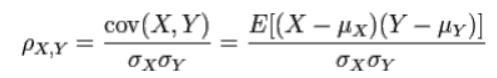

In [19]:
# 나이와 소득의 상관관계

df.age.corr(df.earn)

0.07400349177836058

In [24]:
df.age[(df.age < 50) & (df.age > 25)].corr(df.earn)

0.21837187838043406

In [20]:
# 나이와 소득의 공분산

df.age.cov(df.earn)

36523.6992104089

In [21]:
# 소득과 상관관계가 높은 것을 찾을 때

df.corrwith(df.earn)

earn      1.000000
height    0.291600
sex      -0.337328
race     -0.063977
ed        0.350374
age       0.074003
dtype: float64

In [22]:
# 전체 간의 상관관계를 볼 때

df.corr()

,earn,height,sex,race,ed,age
earn,1.000000,0.291600,-0.337328,-0.063977,0.350374,0.074003
height,0.291600,1.000000,-0.703672,-0.045974,0.114047,-0.133727
sex,-0.337328,-0.703672,1.000000,0.000858,-0.061747,0.070036
race,-0.063977,-0.045974,0.000858,1.000000,-0.049487,-0.056879
ed,0.350374,0.114047,-0.061747,-0.049487,1.000000,-0.129802
age,0.074003,-0.133727,0.070036,-0.056879,-0.129802,1.000000
